In [94]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use("default")

## Markov Decision Process

Decision making under uncertainity.

**Table of Contents:**

- Markov Process
    - Transition probabilities
- Markov Reward Process
    - Rewards
- Markov Decision Process
  - Epidemic Modeling
      - Population simulation
      - Evolution of the system
      - Incorporating actions
      - Incorporating rewards

### Markov Process
Markov property: Transition probabilities depend only on the current state and not on the prvious states.

Ex.

**Transition probabilities** represented as a transition matrix:

|       | sunny | rainy |
| ----- | ----- | ----- |
| sunny | 0.8   |  0.2  |
| rain  | 0.1   |  0.9  |

- Given that today is "sunny" there is a 0.8 probability that tomorrow is also "sunny" and 0.2 probability that tomorrow is "rainy".
- Given that today is "rainy" there is a 0.9 probability that tomorrow is also "rainy" and 0.1 probability that tomorrow is "sunny".

In [95]:
# possible states
S = ["sunny", "rainy"]

# transition probabilities
P = {"sunny":[0.8,0.2], "rainy":[0.1,0.9]}
P

{'sunny': [0.8, 0.2], 'rainy': [0.1, 0.9]}

In [96]:
states = []

current_state = "sunny"
states.append(current_state)

for _ in range(10):
  # choose the state based on the transition probabilites from the current state
  next_state = random.choices(S, P[current_state])[0]

  states.append(next_state)
  current_state = next_state

states

['sunny',
 'sunny',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy']

### Markov reward process

**Rewards** are added to the transitions. Every transition is rewarded: (-ve or 0 or +ve). It is known as the one step reward.


Ex.

States: {Computer, Coffee, Chat}

Transition matrix:

|          | Computer | Coffee | Chat |
| -------- | -------- | ------ | ---- |
| Computer | 0.5      | 0.3    | 0.2  |
| Coffee   | 0.5      | 0.2    | 0.3  |
| Chat     | 0.7      | 0.1    | 0.2  |

Reward matrix:

|               |   Computer   |    Chat    |   Coffee   |
|---------------|--------------|------------|------------|
|   Computer    |      10      |     -7     |     5      |
|     Chat      |      5       |     -3     |     -1     |
|    Coffee     |      5       |     -3     |     0      |

---

Rewards represented as a table:

| Current state | Next State | One-step reward |
| ------------- | ---------- | --------------- |
| Computer      | Computer   | 10              |
| Computer      | Chat       | \-7             |
| Computer      | Coffee     | 5               |
| Chat          | Chat       | \-3             |
| Chat          | Coffee     | \-1             |
| Chat          | Computer   | 5               |
| Coffee        | Chat       | \-3             |
| Coffee        | Coffee     | 0               |
| Coffee        | Computer   | 5               |



In [97]:
# States
S = ["Computer", "Coffee", "Chat"]

# Transition probabilities
P = {
    "Computer": [0.5,0.3,0.2],
    "Coffee": [0.5,0.2,0.3],
    "Chat": [0.7,0.1,0.2]
}

# rewards
one_step_reward = {
    ("Computer", "Computer"): 10,
    ("Computer", "Chat"): -7,
    ("Computer", "Coffee"): 5,
    ("Chat", "Chat"): -3,
    ("Chat", "Coffee"): -1,
    ("Chat", "Computer"): 5,
    ("Coffee", "Chat"): -3,
    ("Coffee", "Coffee"): 0,
    ("Coffee", "Computer"): 5
}

In [98]:
states = []
long_term_return = 0
gamma = 0.9

current_state = "Coffee"
states.append(current_state)

for i in range(10):
  # perform transition based on the transion probabilities
  # for the current state
  next_state = random.choices(S, P[current_state])[0]
  # Reward for the transition obtained from the reward matrix
  reward = one_step_reward[(current_state,next_state)]

  states.append(next_state)
  current_state = next_state
  long_term_return += (gamma**i) * reward

print("States: ",states)
print("Long term return: ", long_term_return)

States:  ['Coffee', 'Chat', 'Computer', 'Computer', 'Computer', 'Chat', 'Computer', 'Computer', 'Chat', 'Computer', 'Coffee']
Long term return:  21.305520195


In [99]:
S

['Computer', 'Coffee', 'Chat']

In [100]:
gamma = 0.9
for start_state in S:

  episodes = 1000
  return_sum = 0
  for _ in range(episodes):
    current_state = start_state
    states = []
    long_term_return = 0

    states.append(current_state)

    for i in range(10):
      # perform transition based on the transion probabilities
      # for the current state
      next_state = random.choices(S, P[current_state])[0]
      # Reward for the transition obtained from the reward matrix
      reward = one_step_reward[(current_state,next_state)]

      states.append(next_state)
      current_state = next_state
      long_term_return += (gamma**i) * reward

    return_sum+=long_term_return

  print(f"Avg return when start state is {start_state}: {return_sum/episodes}")




Avg return when start state is Computer: 26.326664969736022
Avg return when start state is Coffee: 21.868320285207012
Avg return when start state is Chat: 23.79207215334199


Get the average discounted return by simulating 1000 episodes:
- starting from coffee, computer, chat.


### Markov Decision Process

Actions are added. Transtion probabilities, rewards and actions are present in an MDP. MDP is choosing the best action given the dynamics of the system.

Ex.

## Epidemic Modeling
### Population simulation

States = [susceptible, Infected, Recovered, Decesased]

Above states can be encoded as S = [0,1,2,3]

Transition probabilities:

|             | Susciptible | Infected | Recovered | Deceased |
| ----------- | ----------- | -------- | --------- | -------- |
| Susciptable | 0.8         | 0.2      | 0         | 0        |
| Infected    | 0           | 0.7      | 0.2       | 0.1      |
| Recovered   | 0           | 0        | 1         | 0        |
| Deceased    | 0           | 0        | 0         | 1        |


Inital state probabilities:
[0.9, 0.1, 0, 0]

In [101]:
# state transition matrix
P = np.array([
    [0.8, 0.2, 0, 0],
    [0, 0.7, 0.2, 0.1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

P

array([[0.8, 0.2, 0. , 0. ],
       [0. , 0.7, 0.2, 0.1],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [102]:
size = 20000

# Number of individuals in each state at start
initial_prob = np.array([0.9, 0.1, 0, 0])
initial_population_state = initial_prob * size

initial_population_state

array([18000.,  2000.,     0.,     0.])

In [103]:
np.dot(initial_population_state, P)

array([14400.,  5000.,   400.,   200.])

Evolution of the system

In [104]:
days = 100

evolution = initial_population_state

current_state = initial_population_state
for i in range(1, days):
  current_state = np.dot(current_state, P)
  evolution = np.vstack([evolution, current_state])


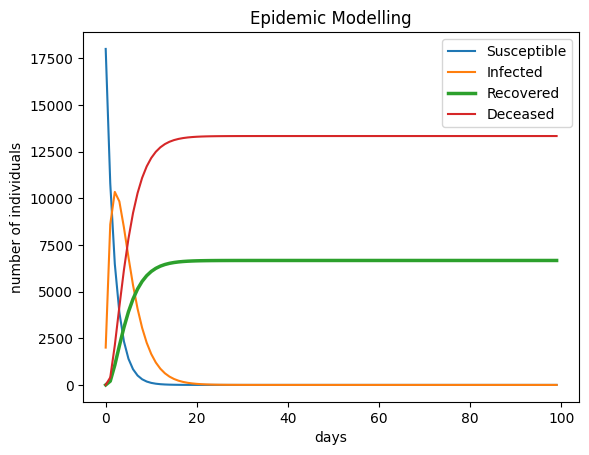

In [116]:
# plot
def plot_evolution(evolution):
  plt.title("Epidemic Modelling")
  plt.plot(evolution[:,0], label = "Susceptible")
  plt.plot(evolution[:,1], label = "Infected")
  plt.plot(evolution[:,2], label = "Recovered",linewidth = 2.5)
  plt.plot(evolution[:,3], label = "Deceased")

  plt.xlabel("days")
  plt.ylabel("number of individuals")

  plt.legend()

plot_evolution(evolution)

#### Incorporating actions

A = {"careful", "ignorant", "extremely_careful"}

Depending on what action the individual takes, the transition probabilities change.

Let us define the transition probabitlites for each action

In [114]:
transtion_proabilities = {"careful": np.array([
                                        [0.8, 0.2, 0, 0],
                                        [0, 0.7, 0.2, 0.1],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1]
                                    ]),
                          "ignorant": np.array([
                                        [0.6, 0.4, 0, 0],
                                        [0, 0.7, 0.1, 0.2],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1]
                                    ]),
                          "extremely_careful": np.array([
                                        [0.85, 0.15, 0, 0],
                                        [0, 0.6, 0.35, 0.05],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1]
                                    ]),
                          }

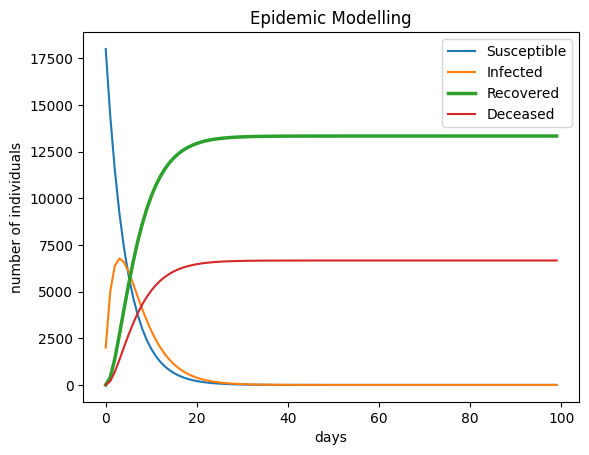

In [117]:
days = 100

P = transtion_proabilities["careful"]

evolution = initial_population_state

current_state = initial_population_state
for i in range(1, days):
  current_state = np.dot(current_state, P)
  evolution = np.vstack([evolution, current_state])

# plot the evolution of system

plot_evolution(evolution.astype(int))

#### Incorporating rewards

Lets say, **transition to** the following states have the rewards:

- Infected: -2
- Recovered: +10
- Deceased: -20

Now, Obtain the total reward by simulating the MP until the person gets recovered(aquires immunity) or gets deceased, for each of the three actions given that the starting state is susciptable. Do you see which action is the best to take.

In [108]:
def get_reward(current_state, action, next_state):
  if next_state == 1:
    return -2
  if next_state == 2:
    return 10
  if next_state == 3:
    return -20
  return 0

return:  -22


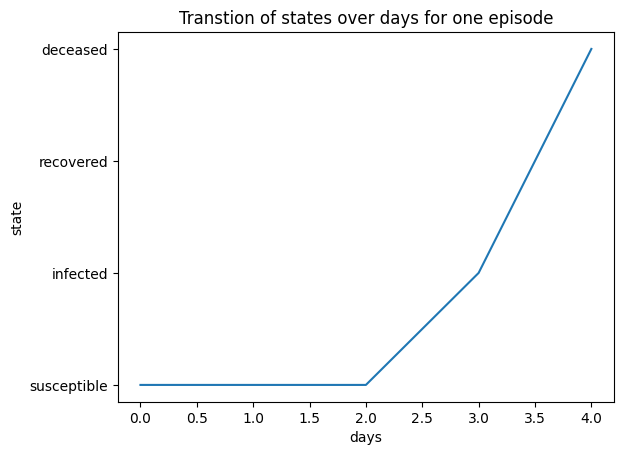

In [109]:
action = "careful"

current_state = 0
states = [current_state]
long_term_return = 0

P = transtion_proabilities[action]

while current_state not in [2,3]:
  next_state = random.choices([0,1,2,3], P[current_state])[0]
  reward = get_reward(current_state, action, next_state)

  long_term_return += reward
  states.append(next_state)
  current_state = next_state

print("return: ", long_term_return)
plt.yticks([0,1,2,3], ["susceptible", "infected", "recovered", "deceased"])
plt.ylabel("state")
plt.xlabel("days")
plt.title("Transtion of states over days for one episode")
plt.plot(states)

Fix the start state to 0 (sus.), and calculate the total avg return for taking different actions.
